# Naive Bayes Classifier

- These models are based on simple probabilistic models of how the data in each class might have been generated.
- They are called naive because they make the simplifying assumption that each feature of an instance is independent of all the others, given the class --> This isn't often the case as features are often correlated.
- They are highly efficient at learning and predicting
- Generalization performance may be worse than for more sophisticated learning methods
- Especially for high dimensional datasets, these models are competitive in terms of performance

## Types
- **Bernoulli**: binary features (example: word presence/absence)
- **Multinomial**: discrete features (example: word counts)
- **Gaussian**: continuous/real-valued features

## Gaussian
- During training, the Classifier estimates for each feature the mean and standard deviation of the feature for each class
- For prediction, the classifier compares the features of the example data point to be predicted with the feature statistics for each class and selects the class that best matches the data point
- It assumes that the data for each class was generated by a simple class specific Gaussian distribution.
- Predicting the class of a new data point corresponds mathematically to estimating the probability that each classes Gaussian distribution was most likely to have generated the data point. The Classifier then picks the class that has the highest probability.
- In general, the decision boundary is a parabolic curve between the classes

<img src="resources/naive_bayes_decision_boundary.png" width = "400">

- The centers of the Gaussian distribution correspond to the mean value of each feature for each class.

<img src="resources/naive_bayes_decision_boundary_2.png" width = "400">

## Extras
- Naive Bayes has a method in Scikit Learn called partial-fit for **incremental training**. This allows us to work with huge datasets that don't fit into memory.
- Tipically, Gaussian Naive Bayes is used for high-dimensional data. When each instance has hundreds, thousands or maybe even more features.

<img src="resources/naive_bayes_pros_cons.png" width = "400">

# Datasets

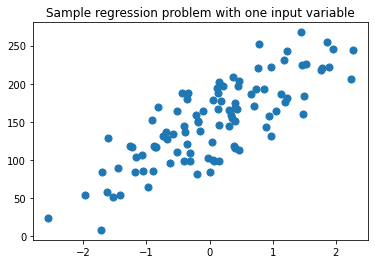

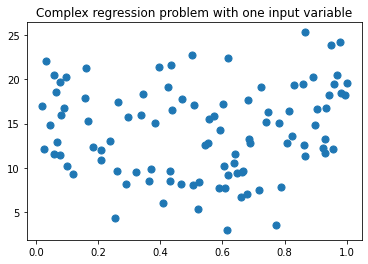

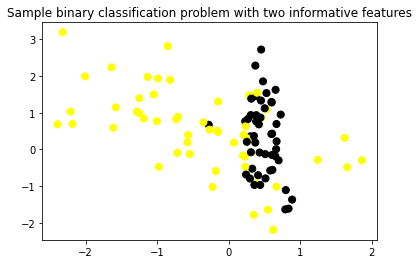

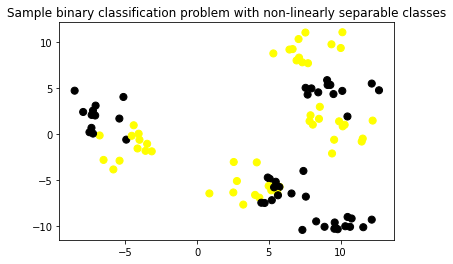

In [3]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from utils.adspy_shared_utilities import load_crime_dataset


cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# fruits dataset
fruits = pd.read_table('data/fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50, cmap=cmap_bold)
plt.show()

# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset("data/CommViolPredUnnormalizedData.txt")

## Naive Bayes Classifier

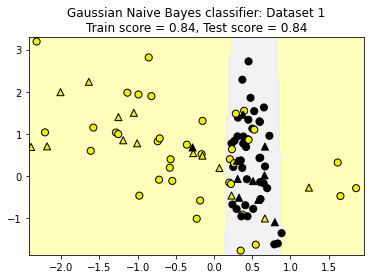

In [6]:
from sklearn.naive_bayes import GaussianNB
from utils.adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 1')

Naive Bayes performs quite well on this data.

However, when classes are not so easily separable, these models don't perform so well, as we can see in the next example.

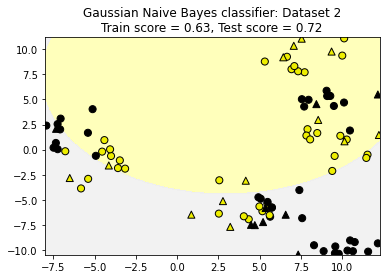

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 2')

## Application to a real-world dataset

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

nbclf = GaussianNB().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.95
Accuracy of GaussianNB classifier on test set: 0.94
